In [32]:
import pandas as pd
from IPython.display import display
import re

columbia_db = pd.read_csv('Disease-Symptom-Knowledge-Database-Columbia-edu.csv', sep=';')
columbia_db['Disease'] = columbia_db['Disease'].fillna(method='ffill') # Preenche os valores nulos com o valor da linha anterior
columbia_db['Disease'] = columbia_db['Disease'].apply(lambda x: re.sub(r'UMLS:C\d+_', '', x) if pd.notnull(x) else x) # Remove o prefixo UMLS:Código_
columbia_db['Symptom'] = columbia_db['Symptom'].apply(lambda x: re.sub(r'UMLS:C\d+_', '', x) if pd.notnull(x) else x) # Remove o prefixo UMLS:Código_
columbia_db = columbia_db.drop(columns=['Count of Disease Occurrence']) # Remove colunas desnecessárias
columbia_db = columbia_db.dropna() # Remove linhas com valores nulos
display(columbia_db.head())
print('Número de doenças:', len(columbia_db['Disease'].unique()), '\nNúmero de sintomas:', len(columbia_db['Symptom'].unique()))

,Disease,Symptom
0,hypertensive disease,pain chest
1,hypertensive disease,shortness of breath
2,hypertensive disease,dizziness
3,hypertensive disease,asthenia
4,hypertensive disease,fall


Número de doenças: 134 
Número de sintomas: 401


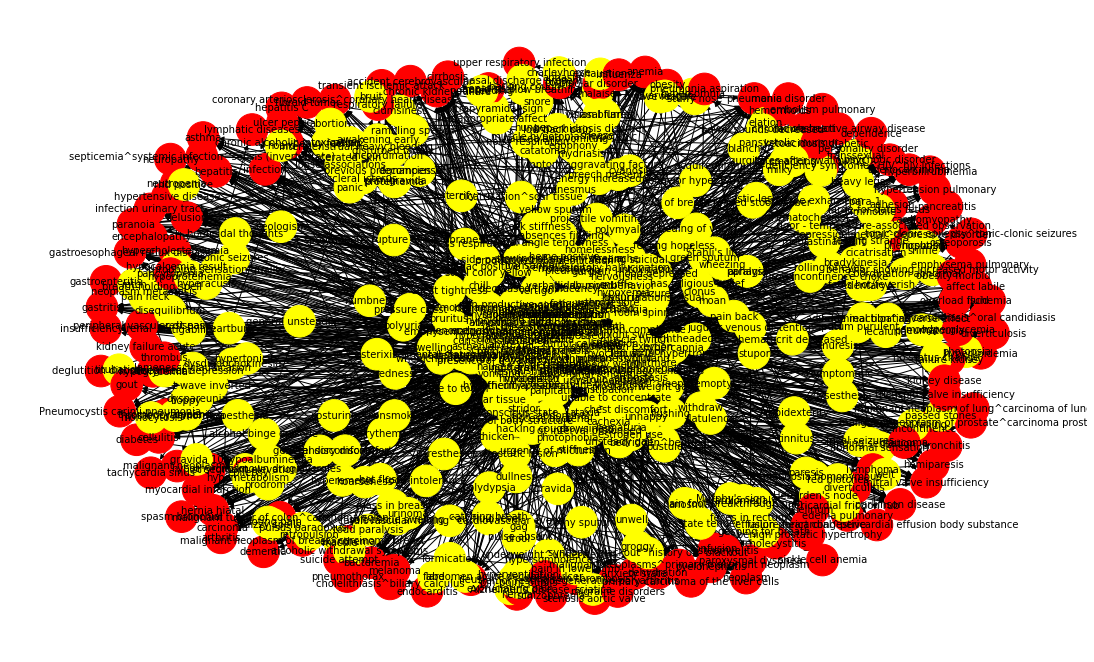

In [36]:
import networkx as nx
import matplotlib.pyplot as plt

# Criando um grafo direcionado
G = nx.DiGraph()

for i, linha in columbia_db.iterrows():
    G.add_node(linha['Disease'], color="red")
    G.add_node(linha['Symptom'], color="yellow")
    G.add_edge(linha['Symptom'], linha['Disease'])

# Obtendo a lista de cores dos nós
node_colors = [data["color"] for _, data in G.nodes(data=True)]

# Aumentar o tamanho da área de exibição
plt.figure(figsize=(15, 9))  # Definindo o tamanho da figura (largura x altura)

# Desenhando o grafo
pos = nx.spring_layout(G, scale=0.6)  # Layout para a visualização
nx.draw(G, pos, with_labels=True, node_size=1000, node_color=node_colors, font_size=10, font_color="black") #, font_weight="bold", arrowsize=20)
plt.show()

In [34]:
# Convertendo o grafo em um objeto de rede do Plotly
pos = nx.spring_layout(G)
edge_trace = []
node_trace = []

for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_trace.append(go.Scatter(x=[x0, x1], y=[y0, y1], mode="lines", line=dict(color="blue", width=2)))

for node in G.nodes():
    x, y = pos[node]
    node_color = G.nodes[node].get("color", "blue")  # Cor padrão para nós
    node_trace.append(go.Scatter(x=[x], y=[y], mode="markers+text", marker=dict(size=30, color=node_color), text=[node], textfont_size=12))

# Criando a figura do Plotly com os elementos do grafo
fig = go.Figure(data=edge_trace + node_trace, layout=go.Layout(showlegend=False, hovermode="closest"))

# Exibindo a figura interativa
fig.show()

In [12]:
import networkx as nx
import matplotlib.pyplot as plt

# Criando um grafo direcionado
G = nx.DiGraph()

for linha in columbia_db.itertuples():
    print(linha['Disease'], linha['Symptom'])


# Desenhando o grafo
pos = nx.spring_layout(G)  # Layout para a visualização
nx.draw(G, pos, with_labels=True, node_size=1000, node_color="skyblue", font_size=12, font_color="black", font_weight="bold", arrowsize=20)
plt.show()


TypeError: tuple indices must be integers or slices, not str

In [4]:


class KnowledgeGraph:
    def __init__(self):
        self.graph = {}

    def add_entity(self, entity):
        if entity not in self.graph:
            self.graph[entity] = []

    def add_relation(self, entity1, relation, entity2):
        if entity1 in self.graph and entity2 in self.graph:
            self.graph[entity1].append((relation, entity2))
            self.graph[entity2].append((relation, entity1))

    def get_relations(self, entity):
        if entity in self.graph:
            return self.graph[entity]
        else:
            return []

# Criar um Knowledge Graph
kg = KnowledgeGraph()

# Adicionar entidades
kg.add_entity("Person")
kg.add_entity("Location")
kg.add_entity("Company")

# Adicionar relações
kg.add_relation("Person", "works_at", "Company")
kg.add_relation("Person", "lives_in", "Location")

# Obter relações de uma entidade
relations = kg.get_relations("Person")
for relation, target_entity in relations:
    print(f"Person has relation '{relation}' with {target_entity}")


Person has relation 'works_at' with Company
Person has relation 'lives_in' with Location


In [11]:
disease_features = pd.read_csv('disease_features.csv', sep=',')
# mostrar linhas onde mayo_symptom não é NaN
disease_features[disease_features['mayo_symptoms'].notna()]

,node_index,mondo_id,mondo_name,group_id_bert,group_name_bert,mondo_definition,umls_description,orphanet_definition,orphanet_prevalence,orphanet_epidemiology,orphanet_clinical_description,orphanet_management_and_treatment,mayo_symptoms,mayo_causes,mayo_risk_factors,mayo_complications,mayo_prevention,mayo_see_doc
6,27172,9699,action myoclonus-renal failure syndrome,NaN,NaN,Action myoclonus-renal failure syndrome (AMRF)...,Syndrome with characteristics of episodes of m...,A rare epilepsy syndrome characterized by prog...,<1/1000000,NaN,NaN,NaN,People with myoclonus often describe their sig...,Myoclonus may be caused by a variety of underl...,NaN,NaN,NaN,"When to see a doctor, If your myoclonus sympto..."
8,27176,12035,craniosynostosis-intracranial calcifications s...,NaN,NaN,Craniosynostosis-intracranial calcification is...,A form of syndromic craniosynostosis with char...,Craniosynostosis-intracranial calcifications s...,<1/1000000,NaN,NaN,NaN,The signs of craniosynostosis are usually noti...,Often the cause of craniosynostosis is not kno...,"If untreated, craniosynostosis may cause, for ...",NaN,NaN,"When to see a doctor, Your doctor will routine..."
9,27176,12035,craniosynostosis-intracranial calcifications s...,NaN,NaN,Craniosynostosis-intracranial calcification is...,A form of syndromic craniosynostosis with char...,Craniosynostosis-intracranial calcifications s...,<1/1000000,NaN,NaN,NaN,The signs of craniosynostosis are usually noti...,Often the cause of craniosynostosis is not kno...,"If untreated, craniosynostosis may cause, for ...",NaN,NaN,"When to see a doctor, Your doctor will routine..."
25,27186,7099,familial visceral amyloidosis,NaN,NaN,NaN,NaN,"A group of rare renal diseases, characterized ...",NaN,NaN,NaN,NaN,You may not experience signs and symptoms of a...,There are many different types of amyloidosis....,Factors that increase your risk of amyloidosis...,The potential complications of amyloidosis dep...,NaN,"When to see a doctor, See your doctor if you p..."
26,27189,8196,parastremmatic dwarfism,NaN,NaN,Parastremmatic dwarfism is a very rare chondro...,Parastremmatic dwarfism is a very rare chondro...,A very rare chondrodysplasia characterized by ...,<1/1000000,Only 5 cases have been described to date.,"Radiographs show bowing of long bones, platysp...",NaN,Signs and symptoms — other than short stature ...,Most dwarfism-related conditions are genetic d...,Complications of dwarfism-related disorders ca...,NaN,NaN,"When to see a doctor, Signs and symptoms of di..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44125,99712,37251,congestive splenomegaly,37251_1367,congestive splenomegaly,NaN,NaN,NaN,NaN,NaN,NaN,NaN,An enlarged spleen may cause: No symptoms in s...,A number of infections and diseases may cause ...,Anyone can develop an enlarged spleen at any a...,Potential complications of an enlarged spleen ...,NaN,"When to see a doctor, See your doctor promptly..."
44127,99866,44141,panic disorder without agoraphobia,44141_44144,panic disorder without or with agoraphobia,A disorder in which an individual experiences ...,A disorder in which an individual experiences ...,NaN,NaN,NaN,NaN,NaN,Typical agoraphobia symptoms include fear of: ...,Biology — including health conditions and gene...,"Agoraphobia can begin in childhood, but usuall...",Agoraphobia can greatly limit your life's acti...,There's no sure way to prevent agoraphobia. Ho...,"When to see a doctor, Agoraphobia can severely..."
44128,99866,44144,panic disorder with agoraphobia,44141_44144,panic disorder without or with agoraphobia,A disorder in which an individual experiences ...,A disorder in which an individual experiences ...,NaN,NaN,NaN,NaN,NaN,Typical agoraphobia symptoms include fear of: ...,Biology — including health conditions and gene...,"Agoraphobia can begin in childhood, but usuall...",Agoraphobia can greatly limit your life's acti...,There's no sure way to prevent agoraphobia. Ho...,"When to see a doctor, Agorap

In [13]:
from networkx import les_miserables_graph 
g = les_miserables_graph()

from yfiles_jupyter_graphs import GraphWidget
from typing import Dict

def void_label_mapping(index: int, node: Dict):
    return ""

w = GraphWidget(graph=g)
w.set_edge_label_mapping(void_label_mapping)
w.show()

GraphWidget(layout=Layout(height='500px', width='100%'))

In [41]:

import medspacy
from medspacy.ner import TargetMatcher, TargetRule
from medspacy.visualization import visualize_ent, visualize_dep
nlp = medspacy.load()
target_matcher = nlp.get_pipe("medspacy_target_matcher")

from spacy.tokens import Span
Span.set_extension("icd10", default="", force = True)
target_rules = [
    TargetRule("diabetes", category="PROBLEM",
              pattern=[
                  {"LOWER": "type"},
                  {"LOWER": {"IN": ["2", "ii", "two"]}},
                  {"LOWER": {"IN": ["diabetes", "diabetic"]}},
                  {"LOWER": "mellitus", "OP": "?"}],
              attributes={"icd10": "E11.9"}),
    TargetRule("diabetes", category="PROBLEM", #Dá pra juntar os dois?
              attributes={"icd10": "E11.9"}),
    TargetRule("Hypertension", category="PROBLEM", #Hipertensão 1
              pattern=[
                   {"LOWER": {"IN": ["htn","hypertension"]}},
                   ],
              attributes={"icd10": "I10"}),
    TargetRule("Hypertension", category="PROBLEM", #Hipertensão 2
              pattern=[
                  {"LOWER": "high"},
                  {"LOWER": {"IN": ["blood", "bp"]}},
                  {"LOWER": "pressure", "OP": "?"}              ],
              attributes={"icd10": "I10"}),
    TargetRule("Heart Disease", category="PROBLEM",
              pattern=[
                  {"LOWER": "heart"},
                  {"LOWER": {"IN": ["disease", "attack"]}},              ],
              attributes={"icd10": "I51.9"}),
    TargetRule(literal="abdominal pain", category="PROBLEM",
           pattern=[
               {"LOWER": "abdominal"},
               {"LOWER": "pain"},           ]),
TargetRule(literal="chiado", category="PROBLEM",
           pattern=[
               {"LOWER": "chiado"},           ]),
TargetRule(literal="recorrentes", category="MODE",
           pattern=[
               {"LOWER": "recorrentes"},           ]),
TargetRule(literal="hydrocholorothiazide", category="TREATMENT",
           pattern=[
               {"LOWER": "hydrocholorothiazide"},           ]),
TargetRule(literal="colon cancer", category="PROBLEM",
           pattern=[
               {"LOWER": "colon"},
               {"LOWER": "cancer"},           ]),
TargetRule(literal="radiotherapy", category="PROBLEM",
           pattern=[
               {"LOWER": "radiotherapy"},           ]),
TargetRule(literal="xrt", category="PROBLEM",
           pattern=[
               {"LOWER": "xrt"},           ]),
TargetRule(literal="tabagismo", category="PROBLEM",
           pattern=[
               {"LOWER": "tabagismo"},           ]),
#Hydrochlorothiazide, Miconazole Nitrate, Heparin Sodium, 5,000 unit/mL Solution; Acetaminophen
TargetRule(literal="Hydrochlorothiazide", category="MEDICATION",
           pattern=[
               {"LOWER": "hydrochlorothiazide"},           ]),
TargetRule(literal="problemas respiratórios", category="PROBLEM",
           pattern=[
               {"LOWER": "problemas"} ,
               {"LOWER": "respiratórios"},           ]),
TargetRule(literal="dificuldades respiratórias", category="PROBLEM",
           pattern=[
               {"LOWER": "dificuldade"} ,
               {"LOWER": "respiratória"},           ]),
TargetRule(literal="tosse", category="PROBLEM",
           pattern=[
               {"LOWER": "tosse"},           ]),

TargetRule(literal="não apresenta", category="NEGATED_EXISTENCE",
           pattern=[
               {"LOWER": "não"},
               {"LOWER": "apresenta"},         ]),
TargetRule(literal="Silvio Jamil", category="PERSON",),
TargetRule('<YEAR> anos de idade', category='AGE',
                 pattern = [
                   { "LOWER": {'REGEX':'^[\d]{2}$'}},
                   { "LOWER": 'anos'},
                   { "LOWER": 'de'},
                   { "LOWER": 'idade'},
                 ])    ]
TargetRule(literal="masculino", category="SEX",),

target_matcher.add(target_rules)

from medspacy.context import ConTextRule
context = nlp.get_pipe('medspacy_context')
context_data = [
    ConTextRule('histórico de', category='HISTORICAL',
                 direction = 'BACKWARD',
                 pattern = [
                   { "LOWER": 'histórico'},
                   { "LOWER": 'de'},
   
                 ])
]
context.add(context_data)

texto = '''Silvio Jamil é um paciente do sexo masculino de 44 anos de idade, com histórico de problemas respiratórios recorrentes. 
Ele relata ter sofrido com sintomas de tosse persistente, chiado no peito e dificuldade respiratória ao longo dos últimos anos. 
O paciente menciona que esses sintomas geralmente pioram durante as mudanças sazonais, exposição a alérgenos e exercícios físicos 
intensos. Ele não apresenta histórico significativo de tabagismo.''' 
visualize_ent(nlp(texto))